In [16]:
install.packages("pROC")
library(pROC)


The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpoVyPiH/downloaded_packages


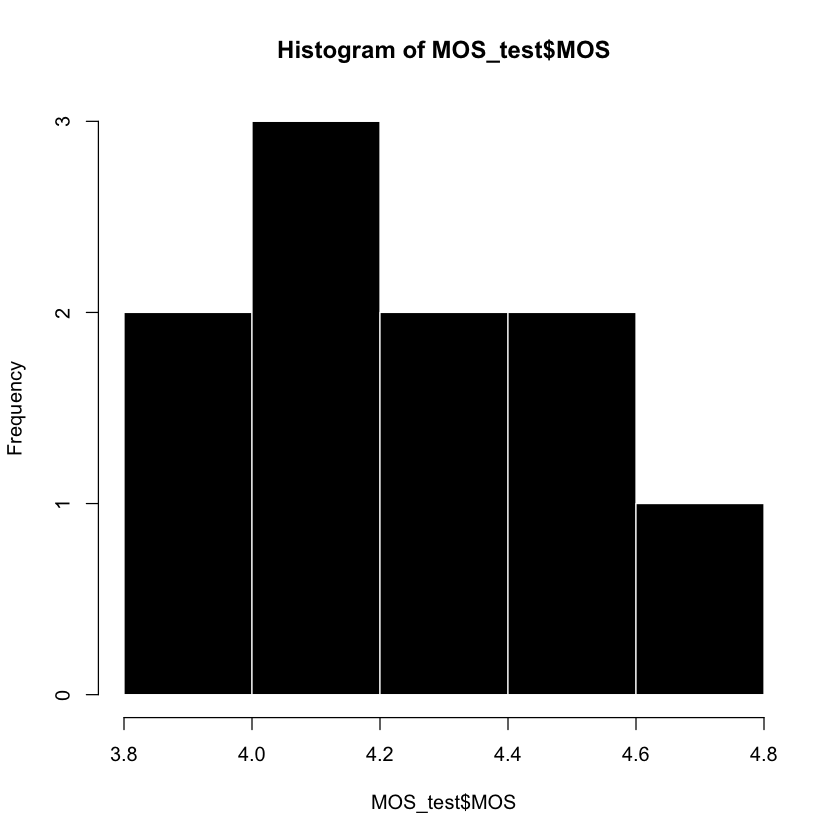

In [21]:
rm(list=ls()) #clears the workspace
#import training dataset
MOS_test = read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/trial_mos_data.csv") 

#plot the target variable
par(bg = "white")  # set background color to white
hist(MOS_test$MOS,
     col = "black",
     border = "white")
#not exactly normally distributed but if the variable is discrete and the number of values is larger than 
# 5 or 6 we can still often use least-squares with decent success

In [22]:
fit <- lm(MOS ~ ., MOS_test)
#fits a linear regression to the data and stores it in the var fit
#where quality is the dependent var
#and all other vars are used to predict quality
summary(fit)


Call:
lm(formula = MOS ~ ., data = MOS_test)

Residuals:
         1          2          3          4          5          6          7 
-0.0205730  0.0317708 -0.0158854 -0.0023192  0.0159346 -0.0233886  0.0006284 
         8          9         10 
 0.0541956 -0.0006284 -0.0397348 

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 11.904363   7.159820   1.663    0.172
e.up         0.007716   0.052157   0.148    0.890
e.down       0.005880   0.009676   0.608    0.576
e.rtt       -0.024883   0.018263  -1.362    0.245
a.up        -0.013179   0.035774  -0.368    0.731
a.down      -0.006531   0.005549  -1.177    0.304
a.rtt              NA         NA      NA       NA

Residual standard error: 0.04186 on 4 degrees of freedom
Multiple R-squared:  0.9899,	Adjusted R-squared:  0.9773 
F-statistic: 78.65 on 5 and 4 DF,  p-value: 0.0004391


Warning message in predict.lm(fit, MOS_test):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(fit, MOS_test):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"


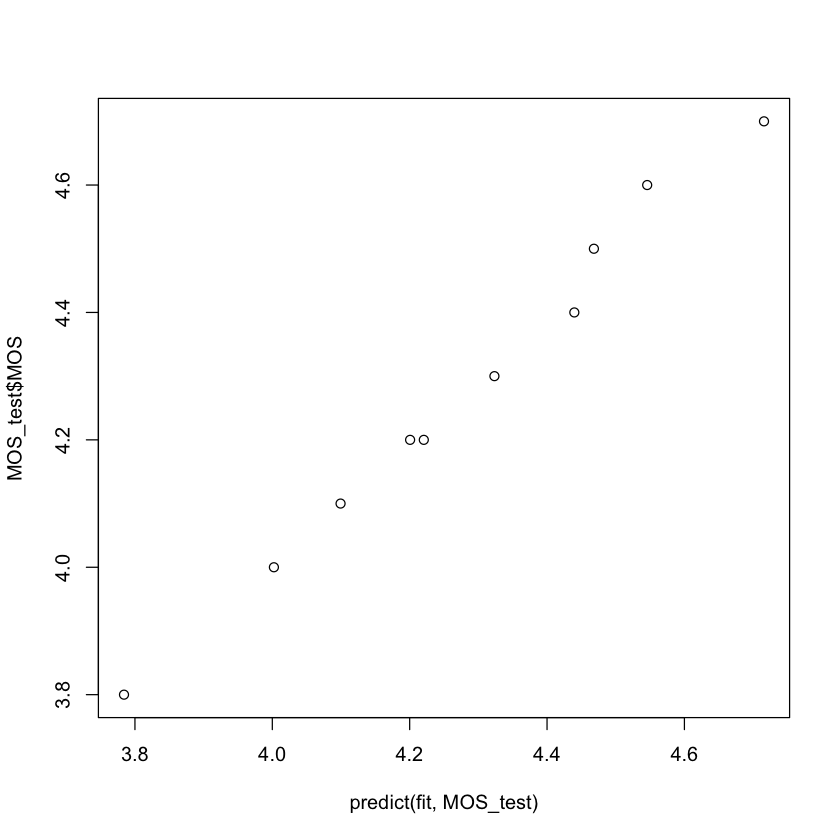

In [27]:
par(bg = "white")  # set background color to white
predictions <- predict(fit, MOS_test)
plot(predict(fit, MOS_test), MOS_test$MOS)
#plots the predicted values against the real values for each datapoint
#a perfect regression would have a y=x diagonal line
#this one is kind of ok (generally diagonal trend)

In [28]:
MOS_test$MOS_binary <- ifelse(MOS_test$MOS >= 4.0, "High", "Low")
MOS_test$MOS_binary <- as.factor(MOS_test$MOS_binary)  # Convert to factor

# Fit a logistic regression model
fit_logistic <- glm(MOS_binary ~ ., 
                    data = tMOS_test, 
                    family = binomial)

# View the summary of the model
summary(fit_logistic)

# Make predictions
predictions <- predict(fit_logistic, MOS_test, type = "response")

# Plot predicted probabilities vs actual binary outcome
plot(predictions, as.numeric(MOS_test$MOS_binary) - 1, 
     xlab = "Predicted Probability", ylab = "Actual Binary Outcome", 
     main = "Predicted Probability vs Actual Binary Outcome")
abline(h = 0.5, col = "red", lty = 2)  # Adds a reference line at 0.5

ERROR: Error in eval(mf, parent.frame()): object 'tMOS_test' not found
